In [1]:
from class_SEIR import SEIR
import numpy as np
import matplotlib.pyplot as plt
#import importlib
from scipy.integrate import odeint
from scipy import stats
from matplotlib.widgets import Slider, Button

In [2]:
def plot_all_states(S, E, I, R, dim):
    """
        dim: dimension of the mobility matrix
    
    """
    plt.subplot(2,2,1)
    #Plot all Susceptible
    for i in range(dim):
        plt.plot(S[i])

    plt.title("Susceptible")
    plt.ylabel("Person")

    plt.subplot(2,2,2)
    #Plot all Exposed
    for i in range(dim):
        plt.plot(E[i])

    plt.title("Exposed")  

    plt.subplot(2,2,3)
    #Plot all Infected
    for i in range(dim):
        plt.plot(I[i])

    plt.title("Infected")
    plt.ylabel("Person")
    plt.xlabel("Time")  

    plt.subplot(2,2,4)
    #Plot all Removed
    for i in range(dim):
        plt.plot(R[i])

    plt.title("Removed")
    plt.xlabel("Time")

    plt.show()
    
#SEIR model function
def model_SEIR(y, t):
    S0 = y[0]
    E0 = y[1]
    I0 = y[2]
    R0 = y[3]
    N  = S0+E0+I0+R0
    dSdt = -beta * I0 * S0 /N
    dEdt = beta * I0 * S0 /N - sigma * E0 
    dIdt = sigma * E0  - (gamma * I0)
    dRdt = gamma * I0 
    return [dSdt, dEdt, dIdt, dRdt]

def mobility_matrix(dim_system, random_modulate=False, num_connected_nodes=None, diffusion=False, diff_value=None,
                    diagonal=False, symmetric=False, centralized=False, central_node=None, node_increment=None):
    """                 
    dim_system:  Integer 
                 Dimension of the mobility matrix
    random_modulate: Bool
                     matrix to set the number of connected nodes
    num_connected_nodes: Integer
                         Number of connected nodes in modulated matrix
    diffusion: Float
               Diffusion of the connected nodes. 0<diffusion<1
    diagonal:    Bool
                 Get a diagonal matrix
    symmetric:   Bool
                 Get a symmetric matrix
    centralized: Bool
                 Get a matrix with nodes with higher input mobility
    central_node: Array
                  Array of nodes that will receive a higher input
    node_increment: Double
                    Size that will be incremented the central nodes
    """
    if centralized:
        # random centralized mobility matrix
        P_syn        = np.random.rand(dim_system, dim_system)
        for i in central_node:
            P_syn[:,i]  *= node_increment                # multiply column i by node_increment
        P_syn        = P_syn/(P_syn.sum(1).reshape(-1,1)) 

    elif symmetric:
            # random symmetric matrix
            P_syn = np.random.rand(dim_system, dim_system)
            P_syn = P_syn/(P_syn.sum(1).reshape(-1,1))
            P_syn = (P_syn + P_syn.T)/2
            
    elif diagonal:
            # disconnected matrix, only diagonal values, ie only mobility in nodes
            P_syn = np.diag(np.repeat(1,dim_system))
            
    elif random_modulate:
            # random normalized matrix with only some nodes connected
            if num_connected_nodes<=1:
                print("Warning: Not connected nodes")
                
            # set diagonal with full population
            P_diag         = np.diag(np.repeat(1.0,dim_system))
            
            if diffusion==True:
                P_diag         = np.diag(np.repeat(0.0,dim_system))
                # Fill with diffusion the connected nodes
                for node_i in range(num_connected_nodes):
                    for node_j in range(num_connected_nodes):
                        if node_i != node_j:
                            
                            P_diag[node_i, node_j] = np.random.rand()#rand_ij
                            
                # replace zero value for one, to avoid zero division
                aux = P_diag.sum(1).reshape(-1,1)
                aux[aux==0]=1
                # Normalize the matrix
                P_syn = P_diag*diff_value/aux #(P_diag.sum(1).reshape(-1,1))
                P_syn = P_syn + (np.diag(np.repeat(1.0,dim_system)- P_syn.sum(1)))                
            else:
                # Fill randomly the connected nodes
                for node_i in range(num_connected_nodes):
                    for node_j in range(num_connected_nodes):
                        P_diag[node_i, node_j] = np.random.rand()
                        P_diag[node_j, node_i] = np.random.rand()
                # Normalize the matrix
                P_syn = P_diag/(P_diag.sum(1).reshape(-1,1))
                #print(P_syn)
        
    else:
            # random normalized mobility matrix
            P_syn = np.random.rand(dim_system, dim_system) # dim_system x dim_system matrix
            P_syn = P_syn/(P_syn.sum(1).reshape(-1,1))     # normalize the matrix, 1-> sum over rows

    def alpha_syn(t):
        return(np.ones([dim_system, dim_system])) #mobility in node
    
    return(P_syn)

## SEIR* model

We have that

$$\beta \hat{S}_i\sum_{j=1}^n\frac{{\hat P}_{ij}}{\hat{N}_j}\hat{I}_j=
\beta k_SS_i\sum_{j=1}^n\frac{P_{ij}\alpha_{ij}(t)}{(\sum_{k=1}^nP_{kj}\alpha_{kj}(t)N_k)}\sum_{l=1}^nP_{lj}\alpha_{lj}(t)I_l(\epsilon\kappa_S+(1-\epsilon)\kappa_I).$$

so the SEIR* system became 

\begin{equation}
    \begin{split}
\frac{dS_i}{dt} &= -\beta \hat{S}_i  \sum_{j=1}^n\frac{\hat{P}_{ij}}{{\hat{N}_j}}\hat{I}_j\\
\frac{dE_i}{dt} &= \beta \hat{S}_i  \sum_{j=1}^n\frac{\hat{ P}_{ij}}{{\hat{N}_j}}\hat{I}_j - \sigma E_i  \\
\frac{dI_i}{dt} &= \sigma E_i - \gamma I_i\\
\frac{dR_i}{dt} &= \gamma I_i\\
\label{SEIR*}
\end{split}
\end{equation}

## Conectivity and entropy analysis

### Increase connected nodes with random distribution between nodes

We will study how and when a metapopulation system SEIR* turns equivalent to an uninode SEIR system.

In [3]:
plt.rcParams["figure.figsize"] = 8, 4

dim_system = 5

P_syn = mobility_matrix(dim_system, random_modulate=True, num_connected_nodes=2)
plt.imshow(P_syn)
plt.colorbar()
plt.show()

NameError: name 'mobility_matrix' is not defined

In [100]:
def alpha_syn(t):return(np.ones([dim_system, dim_system])) #mobility in node

# variables
beta  = 0.3
sigma = 0.1
gamma = 0.1
mu    = 1
epsilon = 1.0
ks = 1.0
ki = 1

total_susceptible = 100000
total_infected    = 10

#Init variables
tr=np.arange(401) #Days
h=0.1

### Multi node system variables ###

# random Susceptible vector
S0 = np.random.rand(dim_system)      # uniform random
#total_susceptible = S
S0 = total_susceptible * S0/S0.sum()

# zero values
E0 = np.zeros(dim_system)
R0 = np.zeros(dim_system)

# random infected vector
I0 = np.random.rand(dim_system)
I0 = total_infected * I0/I0.sum()
#I0 =  np.zeros(dim_system)
#I0[0] = 10

### One node system variables ###

#initial conditions
t  = np.linspace(0, 400., 4000) # time grid, (from, to, number_of_step)
y0 = [S0.sum(), E0.sum(), I0.sum(), R0.sum()]


norm_L2_array      = np.empty(dim_system)
pearson_array      = np.empty(dim_system)
norm_L2_ratio_array = np.empty(dim_system)

I0_sum_array = np.empty((dim_system, 4001))
### iteration ###
for num_nodes in range(1, dim_system+1):
    print("## Number of connected nodes ##", num_nodes)
    #### Multi node system ####
    # Create mobility matrix
    P_syn = mobility_matrix(dim_system, random_modulate=True, num_connected_nodes=num_nodes)
        
    test_syn = SEIR(P_syn,alpha_syn,S0, E0, I0, R0, 
                    beta, sigma, gamma, mu, epsilon, ks, ki)

    test_syn.integr(min(tr),max(tr),0.1, False)

    # sum all states to compare with one node
    S0_sum = 0
    E0_sum = 0
    I0_sum = 0
    R0_sum = 0

    for i in range(dim_system):
        S0_sum += test_syn.S[i]
        E0_sum += test_syn.E[i]
        I0_sum += test_syn.I[i]
        R0_sum += test_syn.R[i]
        
    I0_sum_array[num_nodes-1] = I0_sum

    #### One node system ####
    # solve the ODEs
    soln = odeint(model_SEIR, y0, t) # (model, initial_conditions, time_series)

    #reshape the output of the solver to plot the states
    S_single = soln[:, 0]
    E_single = soln[:, 1]
    I_single = soln[:, 2]
    R_single = soln[:, 3]

    #### Comparison ####
    # Euclidean distance between the two curves
    norm_L2                         = np.linalg.norm(np.array(I0_sum[:-1])-np.array(I_single))
    norm_L2_array[num_nodes-1]      = norm_L2
    pearson_array[num_nodes-1]      = stats.pearsonr(I_single, I0_sum[:-1])[0]
    norm_L2_ratio_array[num_nodes-1]= norm_L2/norm_single

## Number of connected nodes ## 1
Scikit couldn't be imported. Using RK4 instead
## Number of connected nodes ## 2
Scikit couldn't be imported. Using RK4 instead
## Number of connected nodes ## 3
Scikit couldn't be imported. Using RK4 instead
## Number of connected nodes ## 4
Scikit couldn't be imported. Using RK4 instead
## Number of connected nodes ## 5
Scikit couldn't be imported. Using RK4 instead


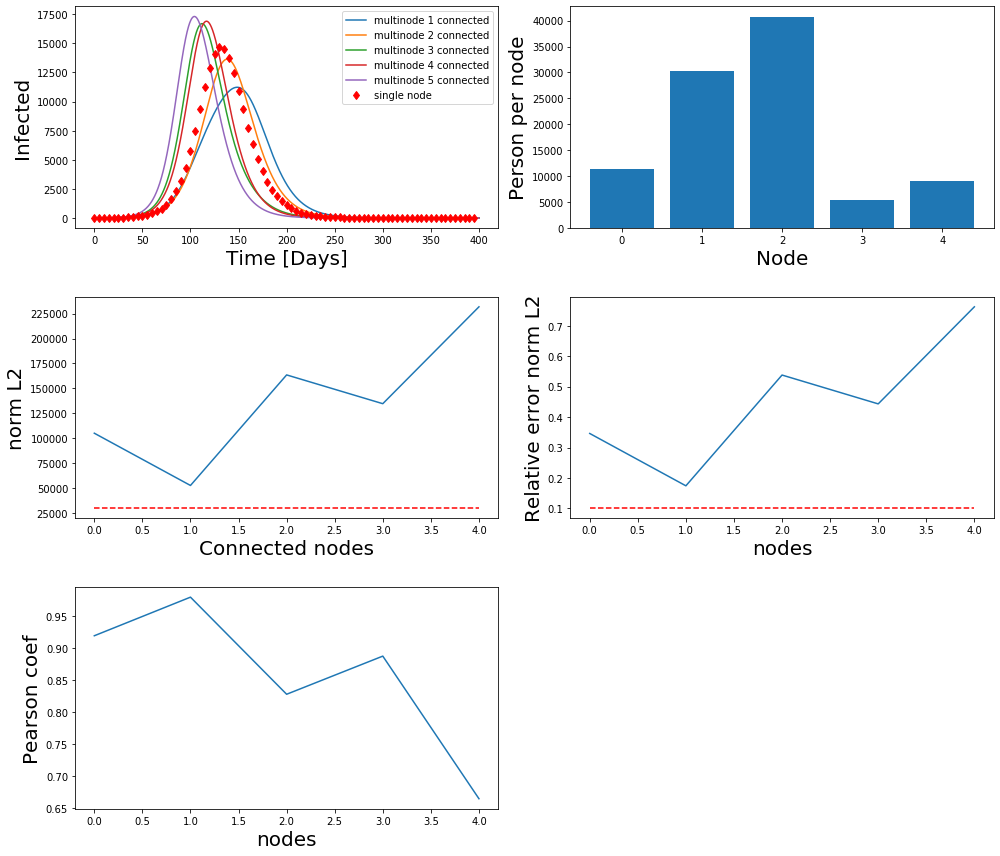

Initial condition 5 nodes
S0  99999.99999999997
I0  10.0
Initial condition single node
S0  99999.99999999997
I0  10.0


In [101]:
plt.rcParams["figure.figsize"] = 14, 12

#plot
plt.subplot(3,2,1)
for i in range(num_nodes):
    plt.plot(t, I0_sum_array[i][:-1], label="multinode {} connected".format(i+1))
plt.plot(t[::50], I_single[::50], "rd", label="single node")
plt.legend()
plt.xlabel("Time [Days]", size=20)
plt.ylabel("Infected", size=20)

plt.subplot(3,2,2)
plt.rcParams["figure.figsize"] = 14, 5
plt.bar(np.arange(dim_system), (P_syn*S0).sum(0))
plt.xlabel("Node", size=20)
plt.ylabel("Person per node", size=20)

plt.subplot(3,2,3)
plt.plot(norm_L2_array)
plt.hlines(30000, 0, dim_system-1, colors="red", linestyles='dashed',)
plt.xlabel("Connected nodes", size=20)
plt.ylabel("norm L2", size=20)

plt.subplot(3,2,4)
plt.plot(norm_L2_ratio_array)
plt.hlines(0.10, 0, dim_system-1, colors="red", linestyles='dashed',)
plt.xlabel("nodes", size=20)
plt.ylabel("Relative error norm L2", size=20)

plt.subplot(3,2,5)
plt.plot(pearson_array)
plt.xlabel("nodes", size=20)
plt.ylabel("Pearson coef", size=20)

plt.tight_layout()
plt.show()

# Create a table instead of this ugly print
print("Initial condition {} nodes".format(dim_system))
print("S0 ",S0.sum())
print("I0 ",I0.sum())

print("Initial condition single node")
print("S0 ", S0.sum())
print("I0 ", I0.sum())

In [102]:
# 1- A mayor numero de nodos conectados, más parecido a una simulacion de 1 nodo grande.
# Pearson correlation > 0.999 results in one node
# Relative error <10% => similar curves

### Increase node connection with diffusion

In [103]:
%matplotlib inline

dim_system = 10
diffusion_array = np.arange(11)/10 # maximum diffusion 1.0, min diffusion 0.0

def alpha_syn(t):return(np.ones([dim_system, dim_system])) #mobility in node

#np.random.seed(seed=2)

### Multi node system variables ###
# random Susceptible vector
S0 = np.random.rand(dim_system)      # uniform random
S0 = total_susceptible * S0/S0.sum()

# zero values
E0 = np.zeros(dim_system)
R0 = np.zeros(dim_system)

# random infected vector
I0 = np.random.rand(dim_system)
I0 = total_infected * I0/I0.sum()

### One node system variables ###
#initial conditions
t  = np.linspace(0, 400., 4000) # time grid, (from, to, number_of_step)
y0 = [S0.sum(), E0.sum(), I0.sum(), R0.sum()]

#### One node system ####
# solve the ODEs
soln = odeint(model_SEIR, y0, t) # (model, initial_conditions, time_series)

#reshape the output of the solver to plot the states
S_single = soln[:, 0]
E_single = soln[:, 1]
I_single = soln[:, 2]
R_single = soln[:, 3]

I0_sum_plot        = np.empty((dim_system, len(diffusion_array), 4001))
norm_L2_plot       = np.empty((dim_system, len(diffusion_array)))
norm_L2_ratio_plot = np.empty((dim_system, len(diffusion_array)))

for num_nodes in range(1, dim_system+1):
    print(num_nodes)
    norm_L2_array       = np.empty(len(diffusion_array))
    norm_L2_ratio_array = np.empty(len(diffusion_array))

    I0_sum_array = np.empty((len(diffusion_array), 4001))
    
    for diffusion in diffusion_array:
        print("num connected nodes", num_nodes)
        print("diffusion in", diffusion)
        P_syn = mobility_matrix(dim_system, num_connected_nodes=num_nodes, random_modulate=True, diffusion=True, 
                            diff_value=diffusion/10)
        print("############### num_nodes={}, diffusion={} ###############".format(num_nodes, diffusion))
        test_syn = SEIR(P_syn,alpha_syn,S0, E0, I0, R0, 
                    beta, sigma, gamma, mu, epsilon, ks, ki)

        test_syn.integr(min(tr),max(tr),0.1, False)

        # sum all states to compare with one node
        S0_sum = 0
        E0_sum = 0
        I0_sum = 0
        R0_sum = 0

        for i in range(dim_system):
            S0_sum += test_syn.S[i]
            E0_sum += test_syn.E[i]
            I0_sum += test_syn.I[i]
            R0_sum += test_syn.R[i]

        #I0_sum_array[num_nodes-1] = I0_sum
        I0_sum_array[int(diffusion*10)] = I0_sum

        #### Comparison ####
        # Euclidean distance between the two curves
        norm_L2 = np.linalg.norm(np.array(I0_sum[:-1])-np.array(I_single))
        norm_L2_plot[num_nodes-1][np.argwhere(diffusion_array==diffusion)]       = norm_L2
        norm_L2_ratio_plot[num_nodes-1][np.argwhere(diffusion_array==diffusion)] = norm_L2/norm_single
    
    I0_sum_plot[num_nodes-1] = I0_sum_array

1
num connected nodes 1
diffusion in 0.0
############### num_nodes=1, diffusion=0.0 ###############
Scikit couldn't be imported. Using RK4 instead
num connected nodes 1
diffusion in 0.1
############### num_nodes=1, diffusion=0.1 ###############
Scikit couldn't be imported. Using RK4 instead
num connected nodes 1
diffusion in 0.2
############### num_nodes=1, diffusion=0.2 ###############
Scikit couldn't be imported. Using RK4 instead
num connected nodes 1
diffusion in 0.3
############### num_nodes=1, diffusion=0.3 ###############
Scikit couldn't be imported. Using RK4 instead
num connected nodes 1
diffusion in 0.4
############### num_nodes=1, diffusion=0.4 ###############
Scikit couldn't be imported. Using RK4 instead
num connected nodes 1
diffusion in 0.5
############### num_nodes=1, diffusion=0.5 ###############
Scikit couldn't be imported. Using RK4 instead
num connected nodes 1
diffusion in 0.6
############### num_nodes=1, diffusion=0.6 ###############
Scikit couldn't be imported. U

6
num connected nodes 6
diffusion in 0.0
############### num_nodes=6, diffusion=0.0 ###############
Scikit couldn't be imported. Using RK4 instead
num connected nodes 6
diffusion in 0.1
############### num_nodes=6, diffusion=0.1 ###############
Scikit couldn't be imported. Using RK4 instead
num connected nodes 6
diffusion in 0.2
############### num_nodes=6, diffusion=0.2 ###############
Scikit couldn't be imported. Using RK4 instead
num connected nodes 6
diffusion in 0.3
############### num_nodes=6, diffusion=0.3 ###############
Scikit couldn't be imported. Using RK4 instead
num connected nodes 6
diffusion in 0.4
############### num_nodes=6, diffusion=0.4 ###############
Scikit couldn't be imported. Using RK4 instead
num connected nodes 6
diffusion in 0.5
############### num_nodes=6, diffusion=0.5 ###############
Scikit couldn't be imported. Using RK4 instead
num connected nodes 6
diffusion in 0.6
############### num_nodes=6, diffusion=0.6 ###############
Scikit couldn't be imported. U

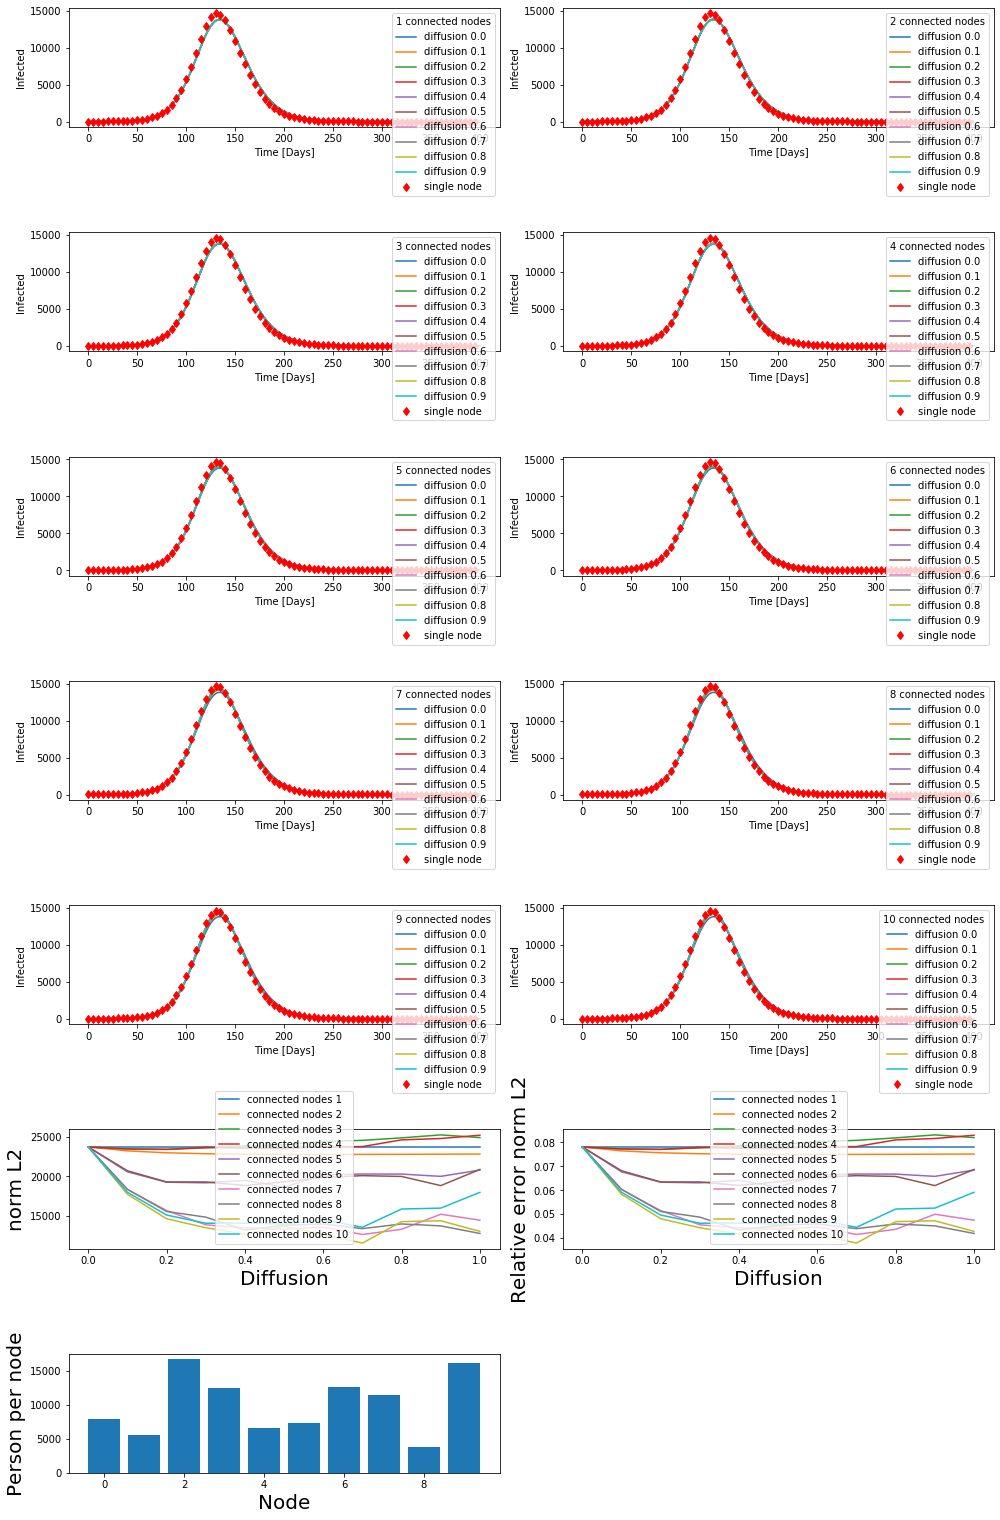

In [104]:
# FIX auto size. Meanwhile, change this value by hand
plt.rcParams["figure.figsize"] = 14, 30

for num_nodes in range(dim_system): # diffusion
    plt.subplot(dim_system,2,num_nodes+1)
    for diffusion in range(10):
        plt.plot(t, I0_sum_plot[num_nodes][diffusion][:-1], label="diffusion {} ".format(diffusion/10))
    plt.plot(t[::50], I_single[::50], "rd", label="single node")
    plt.xlabel("Time [Days]")
    plt.ylabel("Infected")
    plt.legend(title="{} connected nodes".format(num_nodes+1))
    
plt.subplot(dim_system,2,dim_system+1)
for i in range(dim_system):
    plt.plot(diffusion_array, norm_L2_plot[i], label="connected nodes {}".format(i+1))
plt.legend()
plt.xlabel("Diffusion", size=20)
plt.ylabel("norm L2", size=20)

plt.subplot(dim_system,2,dim_system+2)
for i in range(dim_system):
    plt.plot(diffusion_array, norm_L2_ratio_plot[i], label="connected nodes {}".format(i+1))
plt.legend()
plt.xlabel("Diffusion", size=20)
plt.ylabel("Relative error norm L2", size=20)

plt.subplot(dim_system,2,dim_system+3)
plt.bar(np.arange(dim_system), (P_syn*S0).sum(0))
plt.xlabel("Node", size=20)
plt.ylabel("Person per node", size=20)

plt.tight_layout()
plt.show()

## Impact factor

We will study the matrix created by the Impact factor $p_{ijk}$, that tell us how much people from the node $i$ get infected because of people from node $j$, when both are in node $k$.

$p_{ijk}=\frac{\beta}{\bar{N}_k} P_{ik}P_{jk}S_i I_j$

Initial condition 12 nodes
S0  100000.0
I0  30.0
Scikit couldn't be imported. Using RK4 instead
shape p_ijk (12, 12, 12, 4001)
N_bar [8772.27284903 9249.70121932 8542.06572003 7332.47852055 6888.80731154
 7640.26080708 8585.22387999 7886.90245121 8833.53897277 8530.46480349
 7380.6753548  7850.91849473]


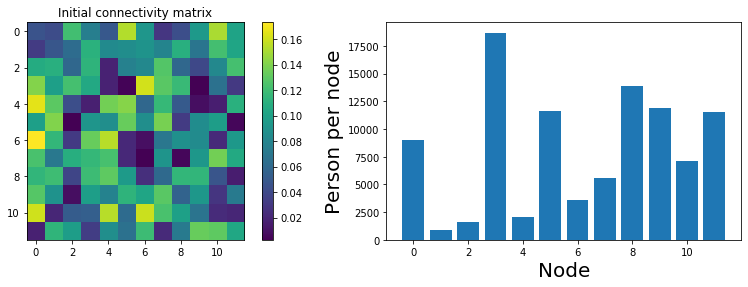

In [7]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 14, 4

dim_system = 12

#np.random.seed(seed=2)

P_syn = mobility_matrix(dim_system)

def alpha_syn(t):return(np.ones([dim_system, dim_system])) #mobility in node

# variables
beta  = 0.3
sigma = 0.1
gamma = 0.1
mu    = 1
epsilon = 1.0
ks = 1.0
ki = 1

total_susceptible = 100000
total_infected    = 10

#Init variables
tr=np.arange(401) #Days
h=0.1

# random Susceptible vector
S0 = np.random.rand(dim_system)  # uniform random
S0 = total_susceptible * S0/S0.sum()

# zero values
E0 = np.zeros(dim_system)
R0 = np.zeros(dim_system)

# random infected vector
#I0 = np.random.rand(dim_system)
#I0 = total_infected * I0/I0.sum()
I0 =  np.zeros(dim_system)
I0[0] = 10
I0[5] = 20

print("Initial condition {} nodes".format(dim_system))
print("S0 ",S0.sum())
print("I0 ",I0.sum())

N     = S0+E0+I0+R0 # not necessary, is inside SEIR class
N_bar = N.dot(P_syn.T) 

test_syn = SEIR(P_syn,alpha_syn,S0, E0, I0, R0, 
                beta, sigma, gamma, mu, epsilon, ks, ki)

test_syn.integr(min(tr),max(tr),0.1, False)

# sum all states to compare with one node
S0_sum = 0
E0_sum = 0
I0_sum = 0
R0_sum = 0

for i in range(dim_system):
    S0_sum += test_syn.S[i]
    E0_sum += test_syn.E[i]
    I0_sum += test_syn.I[i]
    R0_sum += test_syn.R[i]

p_ijk = np.empty(shape=(dim_system, dim_system, dim_system, 4001))  #i,j,k,time
for i in range(dim_system):
    for j in range(dim_system):
        for k in range(dim_system):
            p_ijk[i][j][k] = (beta*P_syn[i][k]*P_syn[j][k]*test_syn.S[i]*test_syn.I[j])/N_bar[k]

print("shape p_ijk", np.shape(p_ijk))
print("N_bar", N_bar)

plt.subplot(1,2,1)
plt.imshow(P_syn)
plt.colorbar()
plt.title("Initial connectivity matrix")

plt.subplot(1,2,2)
plt.rcParams["figure.figsize"] = 14, 5
plt.bar(np.arange(dim_system), (P_syn*(S0+I0)).sum(0))
plt.xlabel("Node", size=20)
plt.ylabel("Person per node", size=20)

plt.show()

<IPython.core.display.Javascript object>


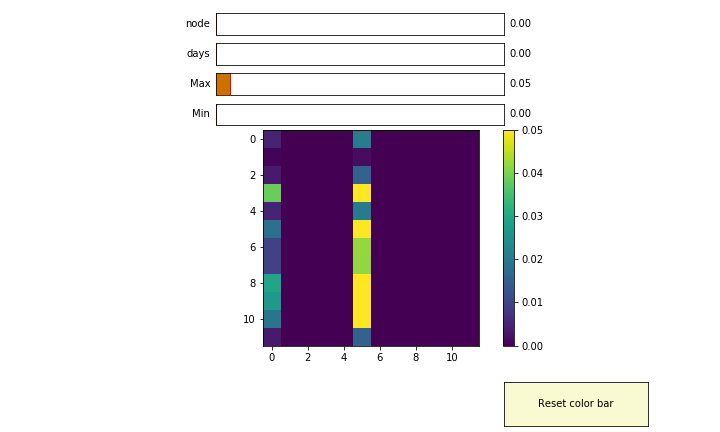

In [11]:
# source: https://towardsdatascience.com/intro-to-dynamic-visualization-with-python-animations-and-interactive-plots-f72a7fb69245
# source: http://nbarbey.github.io/2011/07/08/matplotlib-slider.html
# source: https://matplotlib.org/3.1.1/gallery/widgets/slider_demo.html

# Slider
# Change matplotlib backend
%matplotlib notebook

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2, top=0.70, right=0.8)

# first image
im1 = ax.imshow(p_ijk[:,:,0,0])
fig.colorbar(im1)

# Define bars position and color
axcolor  = 'lightgoldenrodyellow'
ax_nodes = fig.add_axes([0.3, 0.92, 0.4, 0.05])
ax_nodes.spines['top'].set_visible(True)
ax_nodes.spines['right'].set_visible(True)
ax_days  = fig.add_axes([0.3, 0.85, 0.4, 0.05])
ax_days.spines['top'].set_visible(True)
ax_days.spines['right'].set_visible(True)
axmax    = fig.add_axes([0.3, 0.78, 0.4, 0.05])
axmax.spines['top'].set_visible(True)
axmax.spines['right'].set_visible(True)
axmin    = fig.add_axes([0.3, 0.71, 0.4, 0.05])
axmin.spines['top'].set_visible(True)
axmin.spines['right'].set_visible(True)

# Create sliders
node = Slider(ax_nodes, 'node', 0, dim_system, valinit=0, valstep=1, facecolor='#cc7000')
days = Slider(ax_days, 'days', 0, 400, valinit=0, valstep=1, facecolor='#cc7000')
smin = Slider(axmin, 'Min', 0, 1, valinit=0.0, facecolor='#cc7000')
smax = Slider(axmax, 'Max', 0, 1, valinit=0.05, facecolor='#cc7000')

def update(val):
    im1.set_data(p_ijk[:,:,int(node.val),10*int(days.val)]) # show each 10 days
    im1.set_clim([smin.val,smax.val])
    fig.canvas.draw()

node.on_changed(update)
days.on_changed(update)
smin.on_changed(update)
smax.on_changed(update)

# reset button
resetax = plt.axes([0.7, 0.015, 0.20, 0.1])
resetax.spines['top'].set_visible(True)
resetax.spines['right'].set_visible(True)
button = Button(resetax, 'Reset color bar', color=axcolor, hovercolor='0.975')

def reset(event):
    #node.reset()
    #days.reset()
    smin.reset()
    smax.reset()
    
button.on_clicked(reset)

plt.show()

# If not showing
# press shift+enter many times (maybe a slider bug)
# Restart notebook, run 1st and 2nd cell, then the cell above this, then run this.

## Vulnerability

The vulnerability of a sector $i$ is how much the disease impact the sector $i$ due to people going to sector $k$, where they get infected from people of sector $j$.

$v_i= \sum_{j,k} p_{ijk} =\frac{\beta\bar{I}_i}{\bar{N}_i} \sum_{j=1}^n P_{ji}S_j$


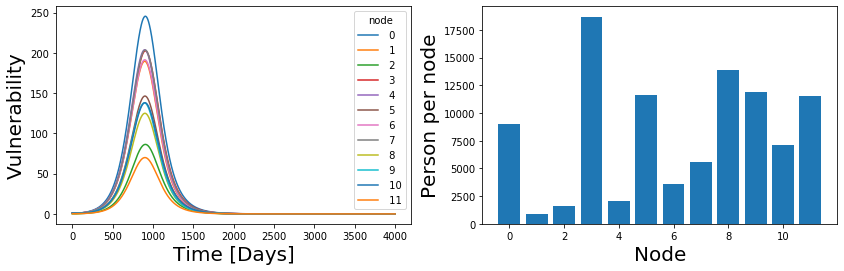

In [13]:
#vulnerability
%matplotlib inline
plt.rcParams["figure.figsize"] = 14, 4

plt.subplot(1,2,1)
for k in range(dim_system):
    vul = []
    for time in range(4001):
        # get the matrix "dim_system x dim_system" in "time" for node k
        vul.append(p_ijk[:,:,k,time].sum())
    plt.plot(vul, label=" {}".format(k))
plt.xlabel("Time [Days]", size=20)
plt.ylabel("Vulnerability", size=20)
plt.legend(title="node")

plt.subplot(1,2,2)
plt.rcParams["figure.figsize"] = 14, 5
plt.bar(np.arange(dim_system), (P_syn*(S0+I0)).sum(0))
plt.xlabel("Node", size=20)
plt.ylabel("Person per node", size=20)

plt.show()

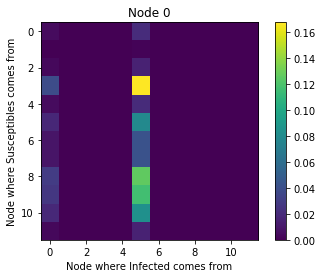

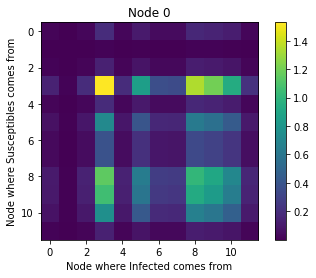

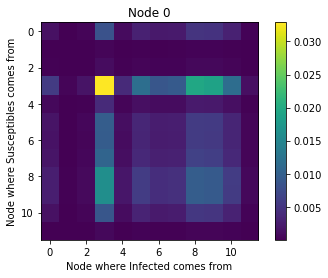

In [8]:
%matplotlib inline

# p_ijk[i, j, node_k, time]
plt.imshow(p_ijk[:,:,0,0])
plt.colorbar()
plt.ylabel("Node where Susceptibles comes from")
plt.xlabel("Node where Infected comes from")
plt.title("Node {}".format(0))
#plt.savefig("impact_t0.png")
plt.show()

plt.imshow(p_ijk[:,:,0,500])
plt.colorbar()
plt.ylabel("Node where Susceptibles comes from")
plt.xlabel("Node where Infected comes from")
plt.title("Node {}".format(0))
#plt.savefig("impact_t500.png")
plt.show()

plt.imshow(p_ijk[:,:,0,2000])
plt.ylabel("Node where Susceptibles comes from")
plt.xlabel("Node where Infected comes from")
plt.title("Node {}".format(0))
plt.colorbar()
#plt.savefig("impact_t2000.png")
plt.show()

In [150]:
np.shape(p_ijk)

(12, 12, 12, 4001)

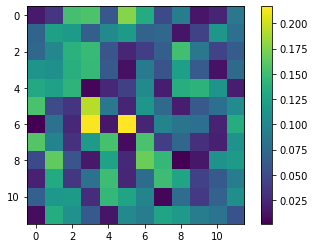

In [14]:
plt.imshow(P_syn)
plt.colorbar()
plt.show()